In [34]:
import pandas as pd
import sidetable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.chdir('C:\\analise_ frebre_ amarela\\asset') #entra na pasta do dastaset
#print(os.getcwd())

1 Entendimento dos Dados
| Objetivo - Identificar as informações relevantes que serão necessárias para compor o objetivo do projeto, reconhecido como a confecção de um painel interativo (Dashboard).

Revisão dos dados
| Objetivo - Identificar as colunas de maior relevância, com base nas informações recebida e definidas como análises 

Identificação:

* ID: Identificador sequencial único 

* MACRORREG_LPI: Sigla da macrorregião do local provável de infecção 

* COD_UF_LPI: Código IBGE da Unidade Federada do local provável de infecção.

* UF_LPI: Sigla da Unidade Federada do local provável de infecção.

* COD_MUN_LPI: Código IBGE do município do local provável de infecção.
  
* SEXO IDADE: Sexo do indivíduo Idade do indivíduo.
   
* DT_IS: Data de início dos sintomas do indivíduo (dd/mm/aaaa).
  
* SE_IS : Semana epidemiológica de início dos sintomas do indivíduo.

* MES_IS: Mês de início dos sintomas do indivíduo.

* ANO_IS: Ano de início dos sintomas do indivíduo.

* MONITORAMENTO_IS: Período de monitoramento de início dos sintomas do indivíduo.

* OBITO: Evolução para o óbito.

* DT_OBITO: Data do óbito (dd/mm/aaaa).



In [3]:
df = pd.read_csv("dataset.csv", encoding='latin-1', delimiter=';')
df.head()

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DT_OBITO
0,1,N,14,RR,140005.0,ALTO ALEGRE,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM,01/12/1994
1,2,N,14,RR,140045.0,PACARAIMA,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO,NaN
2,3,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN,NaN
3,4,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM,09/04/1995
4,5,N,15,PA,150270.0,CONCEIÇÃO DO ARAGUAIA,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM,20/04/1995


In [4]:
#Verificando os valores nulos
df.isnull().sum()

ID                     0
MACRORREG_LPI          0
COD_UF_LPI             0
UF_LPI                 0
COD_MUN_LPI            7
MUN_LPI                6
SEXO                   1
IDADE                  2
DT_IS                  5
SE_IS                 16
MES_IS                11
ANO_IS                 0
MONITORAMENTO_IS       0
OBITO                  0
DT_OBITO            1789
dtype: int64

In [5]:
#filtrando somente pelos Obitos
obitos = df.query("OBITO == 'SIM'")
obitos

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DT_OBITO
0,1,N,14,RR,140005.0,ALTO ALEGRE,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM,01/12/1994
3,4,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM,09/04/1995
4,5,N,15,PA,150270.0,CONCEIÇÃO DO ARAGUAIA,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM,20/04/1995
5,6,N,13,AM,130410.0,TAPAUÁ,M,29,26/01/1996,4.0,1.0,1996,1995/1996,SIM,07/02/1996
6,7,N,13,AM,130356.0,RIO PRETO DA EVA,M,38,27/01/1996,4.0,1.0,1996,1995/1996,SIM,05/02/1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,2760,N,17,TO,172025.0,SÃO SALVADOR DO TOCANTINS,M,28,13/03/2022,11.0,3.0,2022,2021/2022,SIM,21/03/2022
2762,2763,SE,35,SP,355080.0,SÃO SEBASTIÃO DA GRAMA,M,41,16/02/2023,7.0,2.0,2023,2022/2023,SIM,23/02/2023
2764,2765,N,13,AM,130250.0,MANACAPURU,M,16,02/04/2023,14.0,4.0,2023,2022/2023,SIM,13/04/2023
2766,2767,SE,35,SP,354910.0,SÃO JOÃO DA BOA VISTA,M,44,25/04/2023,17.0,4.0,2023,2022/2023,SIM,30/04/2023


In [6]:
#drpando colunas que nao serao utilizadas
obitos.drop(['MACRORREG_LPI', 'COD_UF_LPI'], axis=1, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11376\3755607087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obitos.drop(['MACRORREG_LPI', 'COD_UF_LPI'], axis=1, inplace=True)


In [7]:
#verificando os valores nulos
obitos.stb.missing()

,missing,total,percent
DT_OBITO,31,1010,3.069307
SE_IS,5,1010,0.495050
DT_IS,3,1010,0.297030
MES_IS,2,1010,0.198020
COD_MUN_LPI,2,1010,0.198020
IDADE,1,1010,0.099010
MUN_LPI,1,1010,0.099010
ID,0,1010,0.000000
UF_LPI,0,1010,0.000000
SEXO,0,1010,0.000000


In [8]:
#dropandoos valores nulos
obitos = obitos.dropna()

In [9]:
#verificando se os valores foram dropados
obitos.stb.missing()

,missing,total,percent
ID,0,972,0.0
UF_LPI,0,972,0.0
COD_MUN_LPI,0,972,0.0
MUN_LPI,0,972,0.0
SEXO,0,972,0.0
IDADE,0,972,0.0
DT_IS,0,972,0.0
SE_IS,0,972,0.0
MES_IS,0,972,0.0
ANO_IS,0,972,0.0


In [10]:
#renomendando as colunas
obitos = obitos.rename(columns={
    'DT_IS': 'DT_INIC_SINTOMA',
    'UF_LPI':'UF',
    'COD_MUN_LPI': 'COD_MUNICIPIO',
    'MUN_LPI': 'MUNICIPIO',
    'SE_IS': 'SEMANA_INICIO_SINTOMA',
    'MES_IS': 'MES_INICIO_SINTOMA',
    'ANO_IS': 'ANO_INICIO_SINTOMA',
    })

In [11]:
#tipos de colunas
obitos.dtypes
# as colunas idade, data_inic, ano_inic e data inicio precisa ser colocada no tipo certo

ID                         int64
UF                        object
COD_MUNICIPIO            float64
MUNICIPIO                 object
SEXO                      object
IDADE                     object
DT_INIC_SINTOMA           object
SEMANA_INICIO_SINTOMA    float64
MES_INICIO_SINTOMA       float64
ANO_INICIO_SINTOMA         int64
MONITORAMENTO_IS          object
OBITO                     object
DT_OBITO                  object
dtype: object

In [12]:
# tranformando strings em numericos 
obitos['IDADE'] = pd.to_numeric(obitos['IDADE'], errors='coerce') # errors='coerce' transforma valores não numerico em Nan

In [13]:
#converttendo float em int
#obitos = obitos.astype({'IDADE':'Int64'})

In [14]:
obitos = obitos.astype({'MES_INICIO_SINTOMA':'int64'})

In [15]:
obitos.isnull().sum()

ID                       0
UF                       0
COD_MUNICIPIO            0
MUNICIPIO                0
SEXO                     0
IDADE                    6
DT_INIC_SINTOMA          0
SEMANA_INICIO_SINTOMA    0
MES_INICIO_SINTOMA       0
ANO_INICIO_SINTOMA       0
MONITORAMENTO_IS         0
OBITO                    0
DT_OBITO                 0
dtype: int64

In [16]:
#dropando alguns valores que de Idade que estavam nulos depois da tranformação de tipo
obitos = obitos.dropna()

In [17]:
obitos.stb.missing()

,missing,total,percent
ID,0,966,0.0
UF,0,966,0.0
COD_MUNICIPIO,0,966,0.0
MUNICIPIO,0,966,0.0
SEXO,0,966,0.0
IDADE,0,966,0.0
DT_INIC_SINTOMA,0,966,0.0
SEMANA_INICIO_SINTOMA,0,966,0.0
MES_INICIO_SINTOMA,0,966,0.0
ANO_INICIO_SINTOMA,0,966,0.0


In [18]:
#transformando object em datas
obitos['DT_INIC_SINTOMA'] = pd.to_datetime(obitos['DT_INIC_SINTOMA'], format='%d/%m/%Y')
obitos['DT_OBITO'] = pd.to_datetime(obitos['DT_OBITO'], format='%d/%m/%Y')

In [19]:
#Inicio dos dados 
inicio = obitos['DT_INIC_SINTOMA'].min()
termino = obitos['DT_INIC_SINTOMA'].max()
print(f"de {inicio} a {termino}")

de 1995-04-03 00:00:00 a 2023-08-27 00:00:00


Fazendo os agrupamentos 

In [20]:
#agrupamento de obitos por Estado
agg_sexo = obitos.groupby('SEXO')[['OBITO']].count().sort_values(by='SEXO', ascending=False).reset_index()
agg_sexo


,SEXO,OBITO
0,M,855
1,F,111


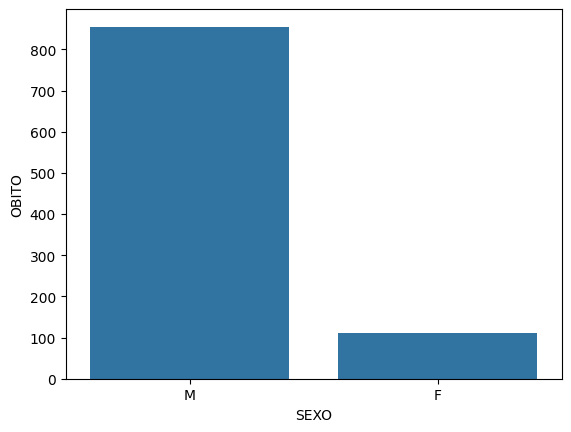

In [21]:
#plotando os dados atraves do seborn
sns.barplot(data=agg_sexo, x="SEXO", y="OBITO");


In [22]:
agg_faixa_etaria = round(obitos.groupby('SEXO')['IDADE'].mean().sort_values(ascending=False).reset_index(), 2)
agg_faixa_etaria

,SEXO,IDADE
0,M,45.80
1,F,45.27


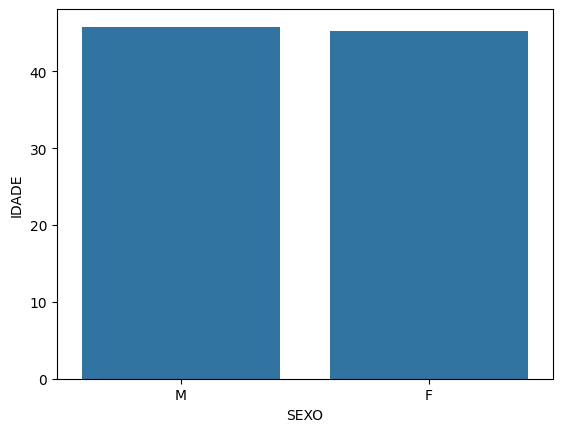

In [23]:
#plotando os dados 
sns.barplot(data=agg_faixa_etaria, x="SEXO", y="IDADE");


In [24]:
#checando a idade minina de falecimento e maxima

idade_minima_obito = obitos['IDADE'].min()
idade_maxima_obito = obitos['IDADE'].max()
print("Menor idade de óbito:", idade_minima_obito)
print("Maior idade de óbito:", idade_maxima_obito)

Menor idade de óbito: 0.0
Maior idade de óbito: 93.0


In [25]:
#agrupando por estados 
agg_uf = obitos.groupby('UF')['OBITO'].agg('count').sort_values(ascending=False).reset_index() #zerando o index ele se tranforma em um dataframe
agg_uf

,UF,OBITO
0,MG,362
1,SP,230
2,RJ,99
3,ES,82
4,GO,51
5,PA,37
6,AM,29
7,MT,16
8,TO,11
9,RR,11


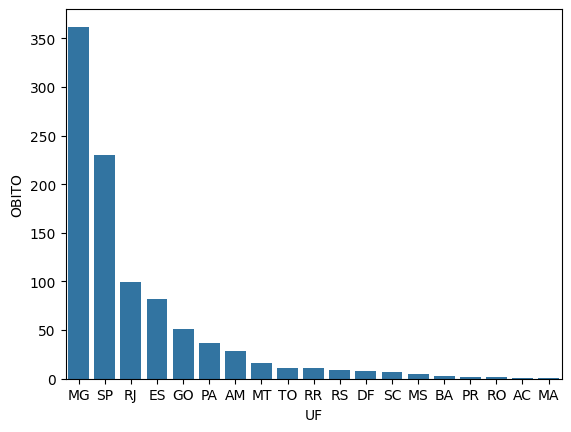

In [26]:
#plotando 
sns.barplot(data=agg_uf, x="UF", y="OBITO");

In [27]:
#agrupando por municipio
agg_muni = obitos.groupby(['MUNICIPIO', 'UF'])['OBITO'].count().sort_values(ascending=False).reset_index()
agg_muni.head(10)

,MUNICIPIO,UF,OBITO
0,MAIRIPORÃ,SP,42
1,LADAINHA,MG,19
2,ANGRA DOS REIS,RJ,16
3,ATIBAIA,SP,16
4,GUARULHOS,SP,14
5,TEÓFILO OTONI,MG,13
6,NOVO CRUZEIRO,MG,12
7,NAZARÉ PAULISTA,SP,12
8,ITAMBACURI,MG,11
9,NOVA LIMA,MG,11


In [36]:
#criando uma nova coluna para saber quanto tempo levou ate o obito poderemos saber a media de dias pra ocorrer o obito
obitos["DIAS_ATE_OBITO"] = (obitos['DT_OBITO'] - obitos['DT_INIC_SINTOMA']).dt.days
obitos["ANO_OBITO"] = obitos['DT_OBITO'].dt.year

In [37]:
obitos.head()

,ID,UF,COD_MUNICIPIO,MUNICIPIO,SEXO,IDADE,DT_INIC_SINTOMA,SEMANA_INICIO_SINTOMA,MES_INICIO_SINTOMA,ANO_INICIO_SINTOMA,MONITORAMENTO_IS,OBITO,DT_OBITO,DIAS_ATE_OBITO,ANO_OBITO
3,4,MA,210060.0,AMARANTE DO MARANHÃO,M,33.0,1995-04-03,14.0,4,1995,1994/1995,SIM,1995-04-09,6,1995
4,5,PA,150270.0,CONCEIÇÃO DO ARAGUAIA,M,26.0,1995-04-12,15.0,4,1995,1994/1995,SIM,1995-04-20,8,1995
5,6,AM,130410.0,TAPAUÁ,M,29.0,1996-01-26,4.0,1,1996,1995/1996,SIM,1996-02-07,12,1996
6,7,AM,130356.0,RIO PRETO DA EVA,M,38.0,1996-01-27,4.0,1,1996,1995/1996,SIM,1996-02-05,9,1996
7,8,AM,130255.0,MANAQUIRI,M,46.0,1996-01-30,5.0,1,1996,1995/1996,SIM,1996-02-11,12,1996


In [30]:
media_dias_obitos = round(obitos['DIAS_ATE_OBITO'].mean(), 2)
print(f"Média de dias entre o início dos sintomas e o óbito é de {media_dias_obitos} Dias")


Média de dias entre o início dos sintomas e o óbito é de 8.53 Dias


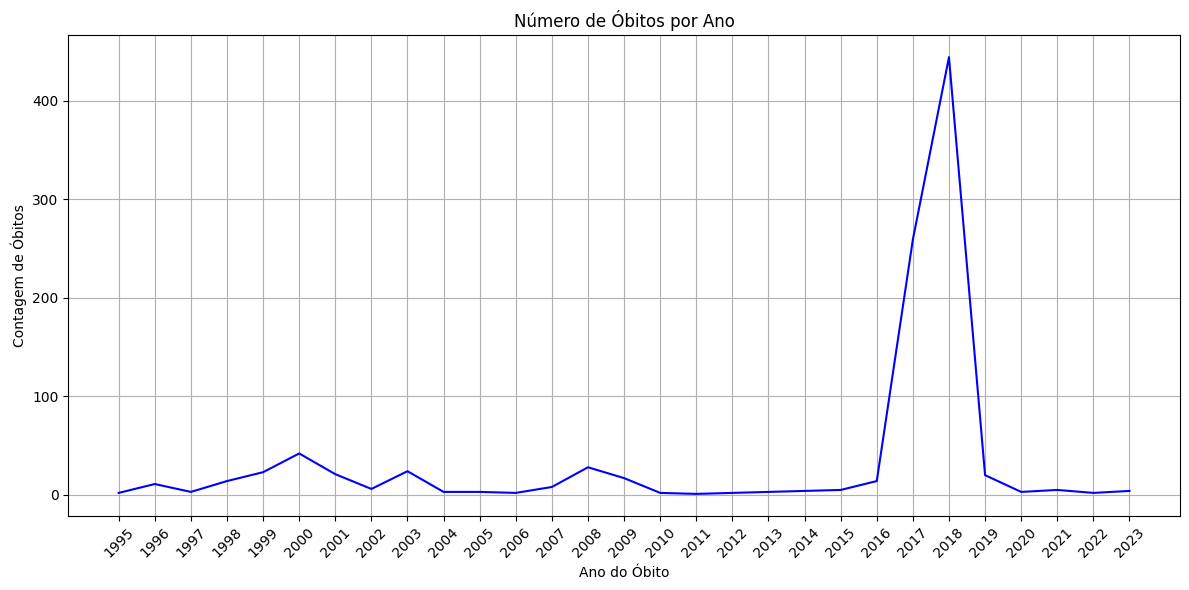

In [43]:
# Agrupar por ano e contar o número de óbitos por ano
serie_temporal_ano = obitos.groupby('ANO_OBITO').size()

# Criar uma lista de todos os anos no intervalo
anos = range(serie_temporal_ano.index.min(), serie_temporal_ano.index.max() + 1)

# Plotar a série temporal de óbitos por ano
plt.figure(figsize=(12, 6))  # Definir o tamanho da figura
plt.plot(serie_temporal_ano.index, serie_temporal_ano.values, linestyle='-', color='b')  # Linha com marcadores
plt.title("Número de Óbitos por Ano")
plt.xlabel("Ano do Óbito")
plt.ylabel("Contagem de Óbitos")

# Forçar todos os anos no eixo X
plt.xticks(anos, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

<class 'pandas.core.series.Series'>
